In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score,plot_confusion_matrix,accuracy_score, recall_score, precision_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
import scipy.stats as stats
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from xgboost import XGBClassifier

from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('../../../data/pgaTourData_clean.csv')
df_2021=pd.read_csv('../../../data/pgaTourData2021_clean.csv')

In [4]:
df['distance_fairway'] = df['avg_distance'] / df['fairway_percentage']

In [5]:
df['winners']=df['wins'].apply(lambda x: 1 if x>0 else 0)
df.head(488)

,player_name,rounds,fairway_percentage,year,avg_distance,gir,average_putts,average_scrambling,average_score,points,wins,top_10,average_sg_putts,average_sg_total,sg:ott,sg:apr,sg:arg,money,distance_fairway,winners
0,Henrik_Stenson,60,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,0,5,-0.207,1.153,0.427,0.960,-0.027,2680487.0,3.876845,0
1,Ryan_Armour,109,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006,1,3,-0.058,0.337,-0.012,0.213,0.194,2485203.0,3.852949,1
2,Chez_Reavie,93,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020,0,3,0.192,0.674,0.183,0.437,-0.137,2700018.0,3.965947,0
3,Ryan_Moore,78,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,0,5,-0.271,0.941,0.406,0.532,0.273,1986608.0,4.020017,0
4,Brian_Stuard,103,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,0,3,0.164,0.062,-0.227,0.099,0.026,1089763.0,3.903975,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,Sung_Kang,89,59.36,2016,292.4,65.26,29.06,59.74,70.856,473,0,2,0.186,0.004,-0.009,-0.121,-0.053,979576.0,4.925876,0
484,Willy_Wilcox,67,59.34,2016,292.9,63.42,28.74,58.18,71.055,399,0,2,-0.027,-0.089,0.040,0.159,-0.261,676841.0,4.935962,0
485,J.J._Henry,68,59.33,2016,287.3,67.51,30.45,53.11,72.019,162,0,0,-0.237,-0.711,-0.144,-0.226,-0.104,280674.0,4.842407,0
486,Harold_Varner_III,92,59.33,2016,302.0,66.24,29.73,56.53,71.045,643,0,4,-0.377,0.101,0.529,0.021,-0.072,1327320.0,5.090174,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1674 entries, 0 to 1673
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   player_name         1674 non-null   object 
 1   rounds              1674 non-null   int64  
 2   fairway_percentage  1674 non-null   float64
 3   year                1674 non-null   int64  
 4   avg_distance        1674 non-null   float64
 5   gir                 1674 non-null   float64
 6   average_putts       1674 non-null   float64
 7   average_scrambling  1674 non-null   float64
 8   average_score       1674 non-null   float64
 9   points              1674 non-null   int64  
 10  wins                1674 non-null   int64  
 11  top_10              1674 non-null   int64  
 12  average_sg_putts    1674 non-null   float64
 13  average_sg_total    1674 non-null   float64
 14  sg:ott              1674 non-null   float64
 15  sg:apr              1674 non-null   float64
 16  sg:arg

In [7]:
df.corr()

,rounds,fairway_percentage,year,avg_distance,gir,average_putts,average_scrambling,average_score,points,wins,top_10,average_sg_putts,average_sg_total,sg:ott,sg:apr,sg:arg,money,distance_fairway,winners
rounds,1.000000,0.081514,0.080201,0.073875,0.249943,-0.127097,0.226248,-0.316830,0.364636,0.103162,0.327737,0.175047,0.319696,0.168305,0.192840,0.111347,0.278091,-0.047212,0.134702
fairway_percentage,0.081514,1.000000,-0.112507,-0.534017,0.342783,0.163327,0.235679,-0.171164,0.032302,-0.047949,0.041247,-0.043056,0.162895,0.179917,0.155834,-0.001253,0.016237,-0.963693,-0.034002
year,0.080201,-0.112507,1.000000,0.220902,0.000006,-0.144955,0.107640,-0.006374,0.057549,0.039006,0.078516,0.023758,0.029388,0.001588,0.011018,0.034933,0.108244,0.154895,0.031866
avg_distance,0.073875,-0.534017,0.220902,1.000000,0.294200,0.168702,-0.228718,-0.272015,0.281107,0.206294,0.267243,-0.137384,0.278270,0.603395,0.142956,-0.190569,0.329295,0.719432,0.175860
gir,0.249943,0.342783,0.000006,0.294200,1.000000,0.551015,0.036261,-0.486806,0.303183,0.120340,0.299846,-0.231149,0.489223,0.584433,0.578938,-0.104616,0.313770,-0.196980,0.082389
average_putts,-0.127097,0.163327,-0.144955,0.168702,0.551015,1.000000,-0.550265,0.262774,-0.282488,-0.168764,-0.282721,-0.720598,-0.265425,0.295616,0.133678,-0.449518,-0.257832,-0.087151,-0.147468
average_scrambling,0.226248,0.235679,0.107640,-0.228718,0.036261,-0.550265,1.000000,-0.519177,0.344421,0.125193,0.347181,0.459051,0.518277,-0.024205,0.195898,0.614123,0.317777,-0.255586,0.091628
average_score,-0.316830,-0.171164,-0.006374,-0.272015,-0.486806,0.262774,-0.519177,1.000000,-0.763993,-0.390254,-0.728738,-0.364698,-0.962385,-0.530372,-0.670174,-0.391596,-0.746499,0.065296,-0.337001
points,0.364636,0.032302,0.057549,0.281107,0.303183,-0.282488,0.344421,-0.763993,1.000000,0.750110,0.848195,0.297614,0.761594,0.437439,0.521278,0.284049,0.949286,0.054745,0.655472
wins,0.103162,-0.047949,0.039006,0.206294,0.120340,-0.168764,0.125193,-0.390254,0.750110,1.000000,0.473453,0.149155,0.384932,0.232414,0.259363,0.134948,0.721665,0.098898,0.887289


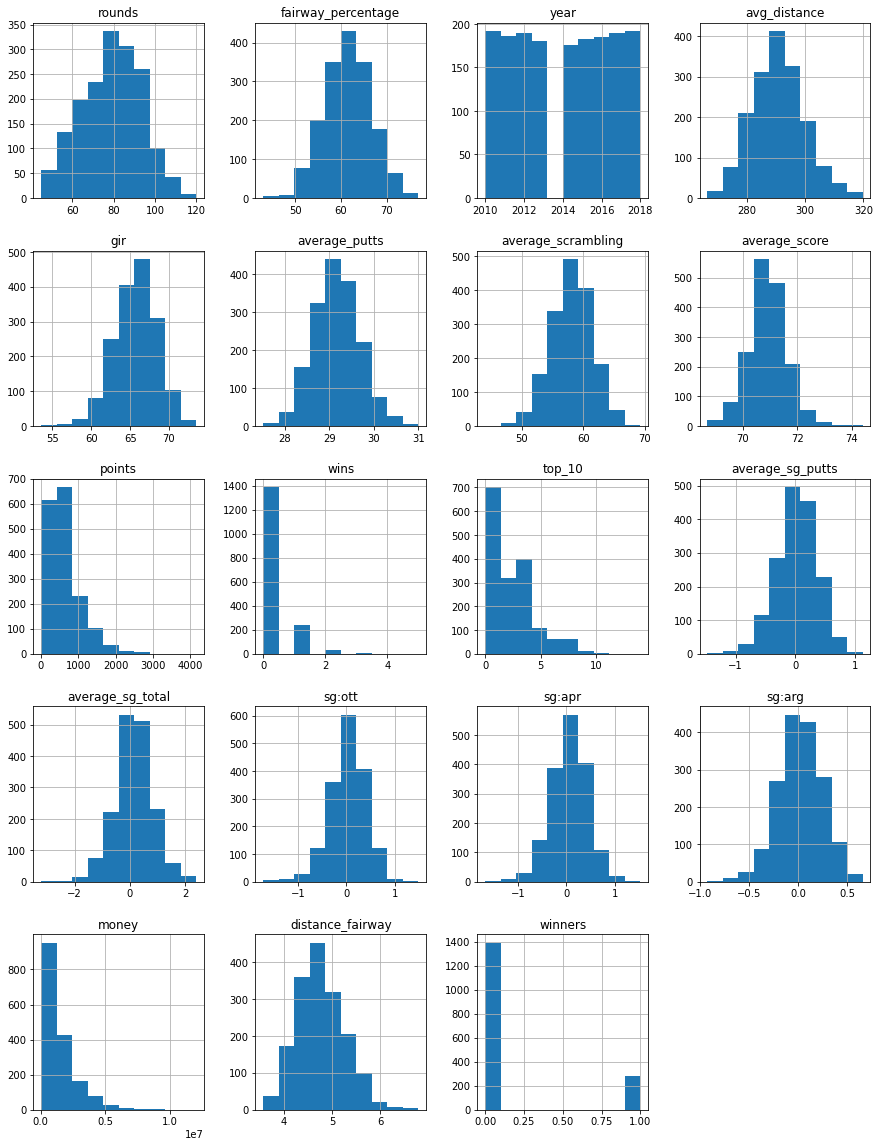

In [8]:
df.hist(figsize = (15,20));

In [9]:
df

,player_name,rounds,fairway_percentage,year,avg_distance,gir,average_putts,average_scrambling,average_score,points,wins,top_10,average_sg_putts,average_sg_total,sg:ott,sg:apr,sg:arg,money,distance_fairway,winners
0,Henrik_Stenson,60,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,0,5,-0.207,1.153,0.427,0.960,-0.027,2680487.0,3.876845,0
1,Ryan_Armour,109,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006,1,3,-0.058,0.337,-0.012,0.213,0.194,2485203.0,3.852949,1
2,Chez_Reavie,93,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020,0,3,0.192,0.674,0.183,0.437,-0.137,2700018.0,3.965947,0
3,Ryan_Moore,78,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,0,5,-0.271,0.941,0.406,0.532,0.273,1986608.0,4.020017,0
4,Brian_Stuard,103,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,0,3,0.164,0.062,-0.227,0.099,0.026,1089763.0,3.903975,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,Phil_Mickelson,76,52.66,2010,299.1,65.13,28.79,61.84,69.966,1629,1,5,-0.147,1.001,0.185,0.738,0.228,3821733.0,5.679833,1
1670,John_Daly,63,52.21,2010,305.7,65.66,29.78,53.53,71.697,97,0,0,-0.653,-0.989,0.336,-0.374,-0.298,158587.0,5.855200,0
1671,Jimmy_Walker,82,51.29,2010,292.9,65.88,29.14,58.46,70.953,554,0,2,0.252,0.093,-0.538,0.336,0.047,937987.0,5.710665,0
1672,Daniel_Chopra,74,51.27,2010,295.9,61.64,28.88,56.16,72.194,142,0,0,0.361,-1.096,-0.307,-1.070,-0.084,311405.0,5.771406,0


In [10]:
def relevants(data):
    rel = []
    for col in data.columns:
        if data[col].dtype != object:
            rel.append(col)
    return rel
def graphs(data):
    relevant = relevants(data.drop('points', axis = 1))
    rowsplot = int(len(relevant)/2 + 1)

    fig, axes = plt.subplots(nrows = rowsplot, ncols = 2, figsize=(20, 100))

    for col, ax in zip(relevant, axes.flatten()):
        sns.scatterplot(data = data, x = col, y = 'points', ax = ax)
        ax.set_title(col, fontsize = 20)

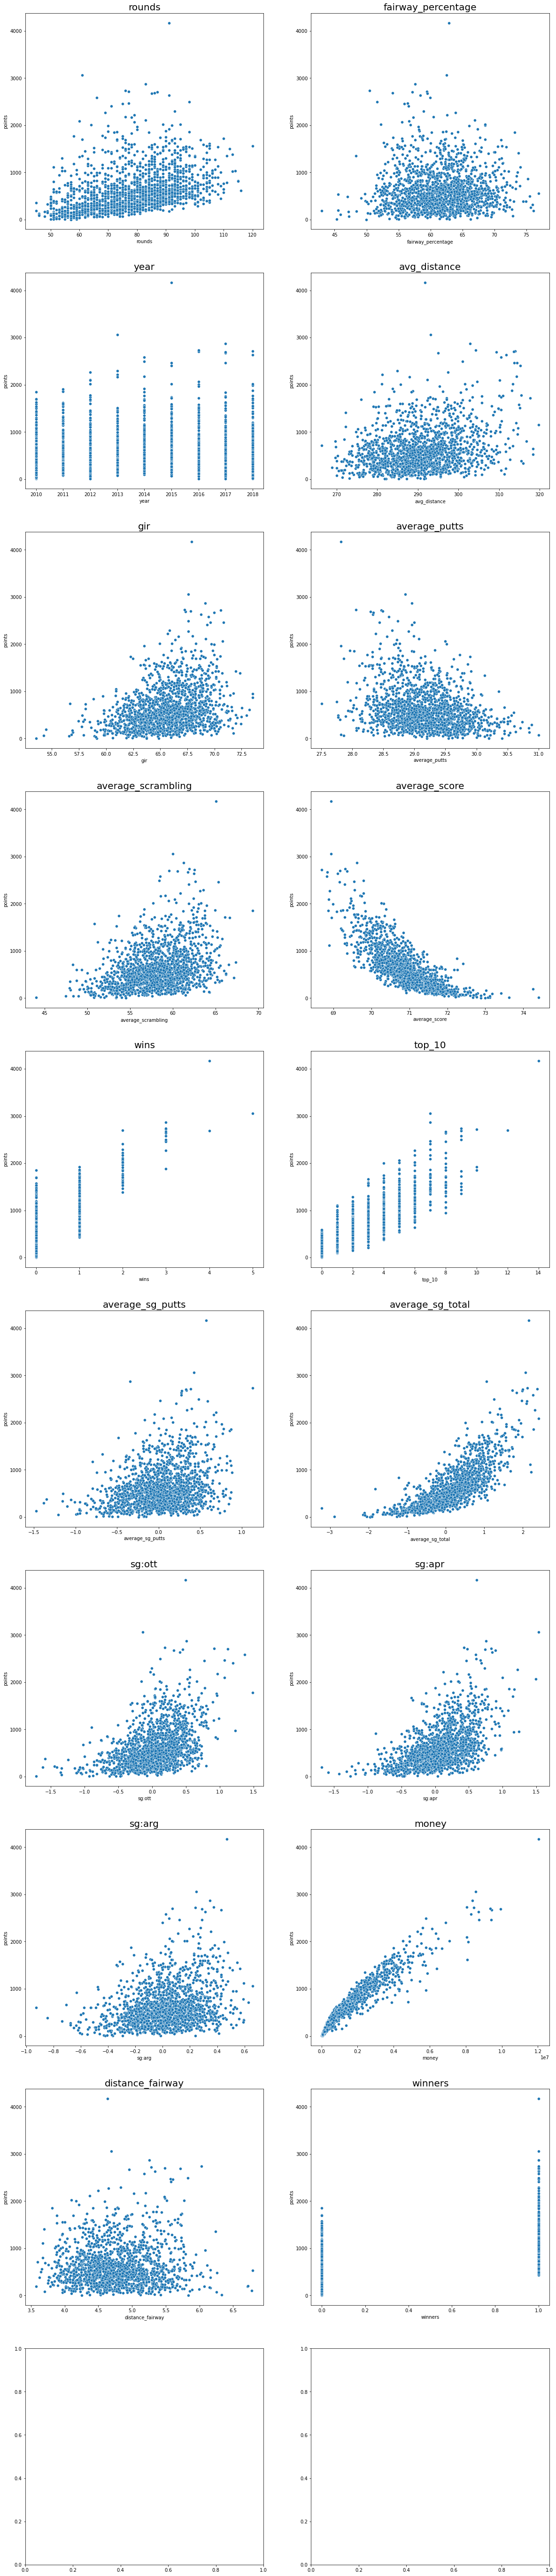

In [11]:
graphs(df)

In [12]:
def make_corrs(data, display = False):
    corrs = data.corr().stack().reset_index()
    corrs = corrs.loc[corrs['level_0'] != corrs['level_1']]
    corrs['pair'] = corrs['level_0'] + ' '+ corrs['level_1']
    corrs['pair'] = corrs['pair'].map(lambda x: ', '.join(sorted(x.split(' '))))
    corrs.drop_duplicates(subset = 'pair', inplace = True)
    corrs.drop(['level_1','level_0'], axis = 1, inplace = True)
    corrs.set_index('pair', inplace = True)
    corrs.columns = pd.Series('correlation')
    corrs = abs(corrs).sort_values('correlation', ascending = False)
    if display:
        display(corrs)
    return corrs

make_corrs(df)

,correlation
pair,
"distance_fairway, fairway_percentage",0.963693
"average_score, average_sg_total",0.962385
"money, points",0.949286
"winners, wins",0.887289
"points, top_10",0.848195
...,...
"average_score, year",0.006374
"average_sg_putts, distance_fairway",0.004338
"sg:ott, year",0.001588


In [13]:
def make_corrs_with_money(data, display = False):
    corrs = make_corrs(data)
    corrs_with_money = corrs.loc[corrs.index.str.contains('money')]
    if display:
        display(corrs_with_money)
    return corrs_with_money

make_corrs_with_money(df)

,correlation
pair,
"money, points",0.949286
"money, top_10",0.827215
"average_sg_total, money",0.747042
"average_score, money",0.746499
"money, wins",0.721665
"money, winners",0.609677
"money, sg:apr",0.510740
"money, sg:ott",0.441912
"avg_distance, money",0.329295


In [14]:
points = df['points']

In [15]:
points

0        868
1       1006
2       1020
3        795
4        421
        ... 
1669    1629
1670      97
1671     554
1672     142
1673     137
Name: points, Length: 1674, dtype: int64

In [16]:
points.describe()

count    1674.000000
mean      631.125448
std       452.741472
min         3.000000
25%       322.000000
50%       530.000000
75%       813.750000
max      4169.000000
Name: points, dtype: float64

In [17]:
point1 = df.loc[df['points'] > 814]
point2 = df.loc[(df['points'] < 814) & (df['points'] > 530)]
point3 = df.loc[df['points'] < 530]

point1['point_range'] = 0
point2['point_range'] = 1
point3['point_range'] = 0



point2021_1 = df_2021.loc[df['points'] > 814]
point2021_2 = df_2021.loc[(df['points'] < 814) & (df['points'] > 530)]
point2021_3 = df_2021.loc[df['points'] < 530]

point2021_1['point_range'] = 0
point2021_2['point_range'] = 1
point2021_3['point_range'] = 0


<ipython-input-17-9c4ed487154b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  point1['point_range'] = 0
<ipython-input-17-9c4ed487154b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  point2['point_range'] = 1
<ipython-input-17-9c4ed487154b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [18]:
frames = [point1, point2, point3]

df = pd.concat(frames)
df

,player_name,rounds,fairway_percentage,year,avg_distance,gir,average_putts,average_scrambling,average_score,points,...,top_10,average_sg_putts,average_sg_total,sg:ott,sg:apr,sg:arg,money,distance_fairway,winners,point_range
0,Henrik_Stenson,60,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,...,5,-0.207,1.153,0.427,0.960,-0.027,2680487.0,3.876845,0,0
1,Ryan_Armour,109,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006,...,3,-0.058,0.337,-0.012,0.213,0.194,2485203.0,3.852949,1,0
2,Chez_Reavie,93,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020,...,3,0.192,0.674,0.183,0.437,-0.137,2700018.0,3.965947,0,0
5,Brian_Gay,103,71.37,2018,282.9,64.52,28.25,63.26,70.280,880,...,6,0.442,0.565,-0.166,0.036,0.253,2152501.0,3.963850,0,0
6,Kyle_Stanley,93,71.29,2018,295.7,71.09,29.89,54.80,70.404,1198,...,5,0.037,0.686,0.378,0.298,-0.027,3916001.0,4.147847,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,Tim_Herron,79,53.49,2010,291.7,66.51,29.36,58.86,71.171,234,...,0,0.171,-0.227,-0.233,-0.211,0.044,391502.0,5.453356,0,0
1668,Rich_Barcelo,70,52.80,2010,287.6,61.72,28.97,54.20,71.751,187,...,0,0.144,-0.520,-1.027,0.228,0.130,188892.0,5.446970,0,0
1670,John_Daly,63,52.21,2010,305.7,65.66,29.78,53.53,71.697,97,...,0,-0.653,-0.989,0.336,-0.374,-0.298,158587.0,5.855200,0,0
1672,Daniel_Chopra,74,51.27,2010,295.9,61.64,28.88,56.16,72.194,142,...,0,0.361,-1.096,-0.307,-1.070,-0.084,311405.0,5.771406,0,0


In [19]:
frames = [point2021_1, point2021_2, point2021_3]

df_2021 = pd.concat(frames)
df_2021

,player_name,points,wins,top_10,avg_score,total_distance,total_drives,fairway_%,fairways_hit,possible_fairways,...,sg:apr,sg:arg,rounds,total_sg:t,total_sg:t2g,total_sg:p,events_y,money,year,point_range
0,Collin_Morikawa,2136,2,8,69.673,37674,128,69.20,620,896,...,1.502,0.159,69,90.134,106.277,-16.140,19,6950768.0,2021,0
1,Jordan_Spieth,2072,1,9,69.909,43006,144,54.29,544,1002,...,0.594,0.428,76,84.096,58.822,25.277,21,6214964.0,2021,0
2,Patrick_Cantlay,2014,2,5,69.975,37350,124,59.91,520,868,...,0.537,0.418,69,92.716,78.283,14.436,20,5620030.0,2021,0
5,Bryson_DeChambeau,1824,2,6,69.911,41073,128,53.00,477,900,...,0.277,0.019,67,95.917,74.203,21.716,18,6078990.0,2021,0
6,Justin_Thomas,1723,1,5,69.838,41106,136,55.80,529,948,...,0.853,0.402,71,78.134,76.363,1.773,19,5953362.0,2021,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Jimmy_Walker,162,0,1,72.294,41550,140,46.92,457,974,...,-0.364,-0.150,70,-53.226,-71.600,18.380,24,519717.0,2021,0
155,Mark_Anderson,160,0,1,71.752,28462,100,64.14,449,700,...,-0.143,0.248,52,0.098,1.962,-1.862,18,338181.0,2021,0
156,"Ted_Potter,_Jr.",157,0,1,72.113,36751,128,56.40,502,890,...,-0.074,-0.026,64,-59.274,-34.389,-24.882,23,355877.0,2021,0
157,Grayson_Murray,122,0,1,73.105,29297,96,50.60,338,668,...,-0.290,-0.466,52,-73.290,-28.161,-45.127,21,255130.0,2021,0


In [20]:
df_2010 = df.loc[df['year'] == 2010]
df_2011 = df.loc[df['year'] == 2011]
df_2012 = df.loc[df['year'] == 2012]
df_2013 = df.loc[df['year'] == 2013]
df_2014 = df.loc[df['year'] == 2014]
df_2015 = df.loc[df['year'] == 2015]
df_2016 = df.loc[df['year'] == 2016]
df_2017 = df.loc[df['year'] == 2017]
df_2018 = df.loc[df['year'] == 2018]

#This was done so I could mess with what years I included

dataframes = [df_2010,df_2011,df_2012, df_2013, df_2014, df_2015, df_2016, df_2017,df_2018]

df_10_18 = pd.concat(dataframes)

In [27]:
df.corr()

,rounds,fairway_percentage,year,avg_distance,gir,average_putts,average_scrambling,average_score,points,wins,top_10,average_sg_putts,average_sg_total,sg:ott,sg:apr,sg:arg,money,distance_fairway,winners,point_range
rounds,1.000000,0.080904,0.081353,0.074983,0.249762,-0.127925,0.225514,-0.317422,0.365205,0.103413,0.327991,0.177656,0.320815,0.167809,0.192987,0.111753,0.278668,-0.046447,0.135021,0.169362
fairway_percentage,0.080904,1.000000,-0.112161,-0.533823,0.343423,0.163851,0.235870,-0.170839,0.032123,-0.047976,0.040913,-0.043100,0.163021,0.179869,0.156303,-0.001451,0.016177,-0.963685,-0.034019,0.080494
year,0.081353,-0.112161,1.000000,0.220888,0.000509,-0.144765,0.108003,-0.006598,0.057515,0.038929,0.078626,0.023158,0.029408,0.002144,0.011195,0.034711,0.108142,0.154610,0.031776,0.009282
avg_distance,0.074983,-0.533823,0.220888,1.000000,0.293538,0.168034,-0.228300,-0.272177,0.281889,0.206597,0.268054,-0.137882,0.278115,0.603650,0.142464,-0.189699,0.330072,0.719272,0.176151,0.002293
gir,0.249762,0.343423,0.000509,0.293538,1.000000,0.550573,0.036629,-0.486918,0.304084,0.120614,0.300461,-0.230746,0.489511,0.583765,0.579006,-0.103238,0.314744,-0.197740,0.082637,0.057035
average_putts,-0.127925,0.163851,-0.144765,0.168034,0.550573,1.000000,-0.550744,0.263243,-0.282256,-0.168621,-0.282540,-0.721243,-0.266028,0.295034,0.133007,-0.449049,-0.257516,-0.087782,-0.147284,-0.042063
average_scrambling,0.225514,0.235870,0.108003,-0.228300,0.036629,-0.550744,1.000000,-0.520678,0.344587,0.124694,0.346791,0.461831,0.520293,-0.024062,0.197046,0.614595,0.317629,-0.255708,0.091012,0.062057
average_score,-0.317422,-0.170839,-0.006598,-0.272177,-0.486918,0.263243,-0.520678,1.000000,-0.764454,-0.390731,-0.729368,-0.364760,-0.962510,-0.530338,-0.670383,-0.392475,-0.747181,0.064988,-0.337500,-0.149429
points,0.365205,0.032123,0.057515,0.281889,0.304084,-0.282256,0.344587,-0.764454,1.000000,0.750260,0.848346,0.297872,0.762166,0.438245,0.521859,0.283792,0.949329,0.055091,0.655621,0.024157
wins,0.103413,-0.047976,0.038929,0.206597,0.120614,-0.168621,0.124694,-0.390731,0.750260,1.000000,0.473281,0.149725,0.385624,0.232726,0.260028,0.134925,0.721659,0.098963,0.887243,-0.123704


Accuracy of logistic regression classifier on test set: 0.42629


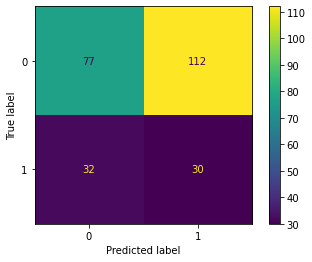

In [26]:
lr = LogisticRegression()
X = df.drop(columns= ['points','point_range','player_name'], axis = 1)

y = df['point_range']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15,random_state=24) 
columns = X_train.columns

X_test = df_2021.drop(columns= ['points','point_range','player_name'], axis = 1)
y_test = df_2021['point_range']

#I scale the X_train and X_test data.
sc = StandardScaler()

X_train_s = sc.fit(X_train).transform(X_train)
X_val_s = sc.transform(X_val)

#Here I select particular variables from X to use for the logistic regression.
#cols=['RPI Last Season','AP Votes', 'Coaches Votes','OPPP','OFGm','OFGM','OPerTO','DPerFT','OaFGPer']
#Now form dataframes from the scaled but not oversampled data with just those␣ 􏰁→columns
#X_s=X_s_data[cols]
#y_s=y_s_data['Sweet 16']
#Form dataframe for X_test_s using only columns specified.
#X_test_s_df_c=X_test_s_df[cols]


lr.fit(X_train, y_train)

y_pred = lr.predict(X_val_s)

print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(accuracy_score(y_val, y_pred)))

plot_confusion_matrix(lr,X_val_s, y_val) 